In [1]:
import huracanpy

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm import tqdm

## Tracks without CPS

In [2]:
flist = glob("TRACK_netcdf/*/*TRACK_all*.nc") # + glob("TRACK_netcdf/*/*TRACK_NH_all*.nc")

In [3]:
# List of available datasets
sources = [f.split('/')[1] for f in flist]
sources

['JRA3Q', 'ERA5', 'ECMWF-OP-AN', 'CERA20C', 'MERRA2', 'NCEP']

In [4]:
# Path dict
filepaths = {sources[i]:flist[i] for i in range(len(flist))}

In [5]:
# Data dict
data = {}
for s in tqdm(sources):
    data[s] = xr.open_dataset(filepaths[s]).rename({"psl":"pres"})

100%|██████████| 6/6 [01:49<00:00, 18.33s/it]


In [13]:
# Check trackids
for s in sources:
    sample = np.random.choice(len(data[s].record), 10)
    sample_pts = data[s].sel(record = sample)
    print(s, sample_pts.track_id.values)

JRA3Q ['SH-1961-19429' 'SH-2014-17654' 'NH-1961-9571' 'NH-1985-18091'
 'NH-1951-13501' 'NH-1951-10649' 'SH-1961-11766' 'NH-1959-1379'
 'NH-1974-10028' 'SH-1999-16663']
ERA5 ['NH-2002-1292' 'SH-1993-7144' 'SH-1979-15989' 'NH-1992-14493'
 'SH-1955-23057' 'NH-1996-18928' 'NH-2016-9171' 'NH-1968-18156'
 'NH-1960-8984' 'NH-2021-11874']
ECMWF-OP-AN ['NH-2011-3083' 'SH-2021-2385' 'NH-2019-2802' 'SH-2011-2677' 'SH-2014-250'
 'SH-2012-2399' 'SH-2019-3379' 'NH-2007-1081' 'SH-2019-4401'
 'NH-2016-4364']
CERA20C ['NH-2001-0-4881' 'SH-1992-9-7268' 'SH-1962-9-7518' 'NH-2007-0-694'
 'SH-1962-9-4513' 'NH-1988-0-15190' 'SH-1942-9-8864' 'NH-1917-0-3971'
 'NH-1977-0-20067' 'SH-1946-9-18116']
MERRA2 ['NH-2013-1994' 'NH-1996-2909' 'NH-2000-2739' 'NH-1992-5789'
 'SH-2023-19855' 'NH-2017-27546' 'SH-1980-1997' 'SH-1995-1059'
 'SH-1996-4120' 'NH-1983-1802']
NCEP ['SH-1998-135' 'NH-2000-5975' 'NH-1979-5125' 'NH-1985-6218' 'NH-1985-1543'
 'NH-1981-7180' 'SH-1997-5644' 'NH-1996-1816' 'SH-1990-2330'
 'NH-1981-3460

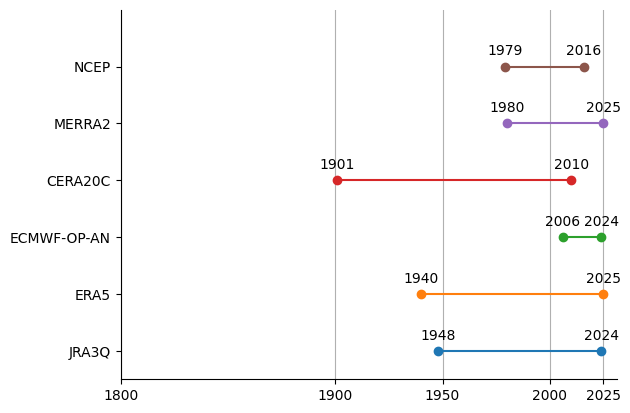

In [7]:
# Check durations
for i, s in enumerate(sources):
    Ymin, Ymax = data[s].time.dt.year.min().values, data[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(sources)), sources)
plt.xticks([1800, 1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(sources))
sns.despine()
plt.grid(axis = 'x')

(0.0, 20010.35)

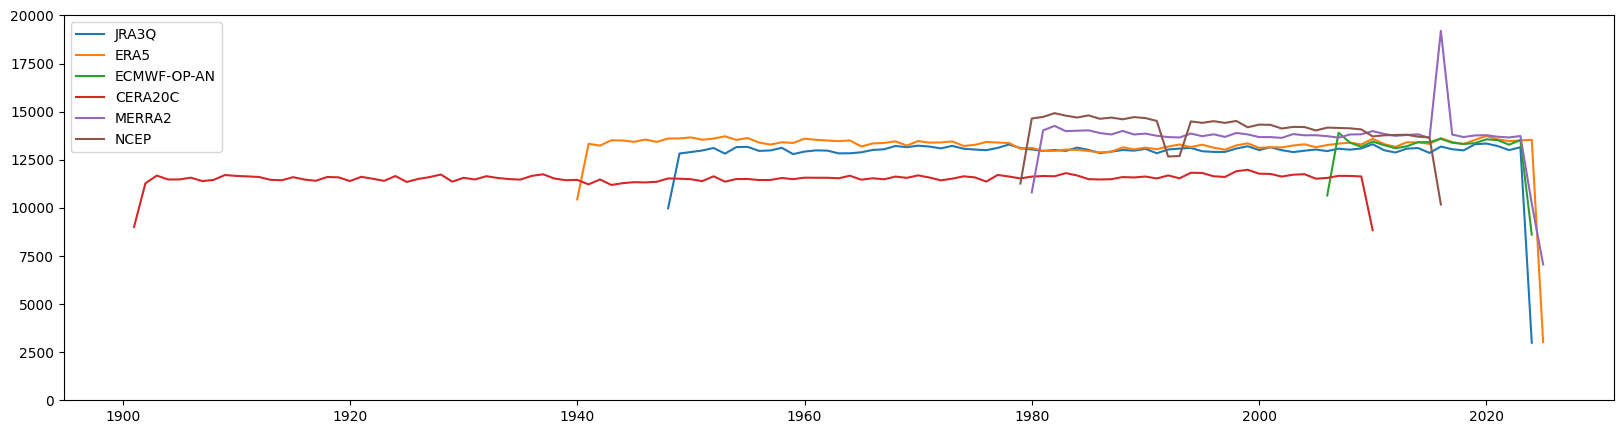

In [14]:
# Check Number of tracks per year
fig, axs = plt.subplots(figsize = (20,5))
for s in sources:
    Y = np.arange(1850, 2030)
    H, _ = np.histogram(data[s].hrcn.get_gen_vals().time.dt.year, bins = np.arange(1849.5, 2030))
    axs.plot(Y[H>0], H[H>0],label = s)
plt.legend()
plt.ylim(0)

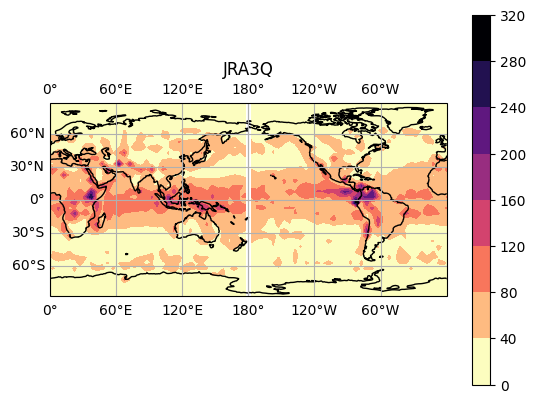

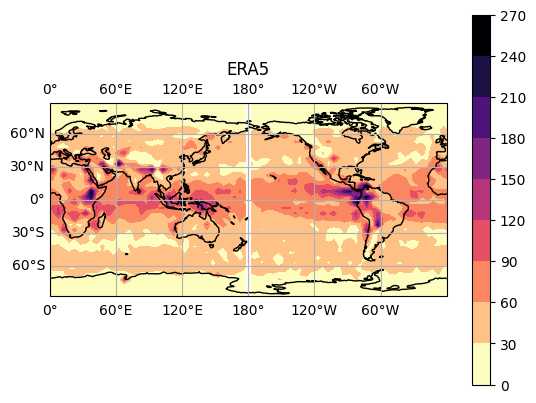

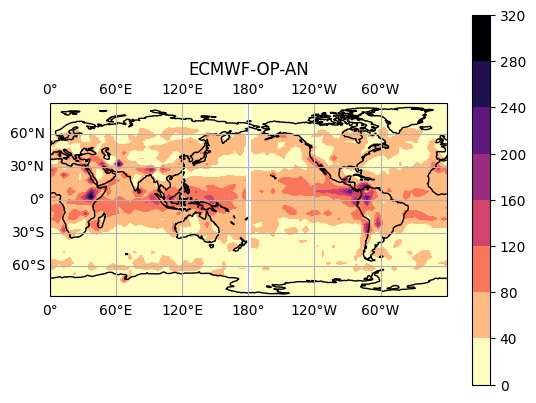

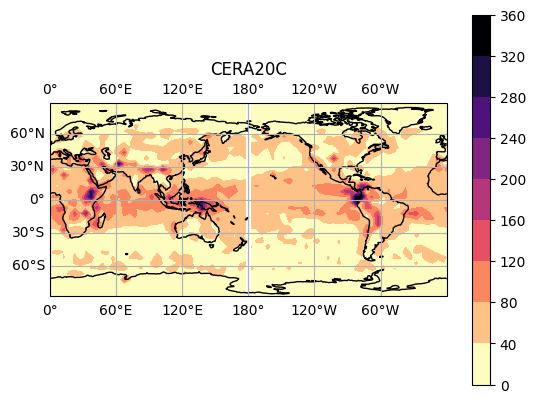

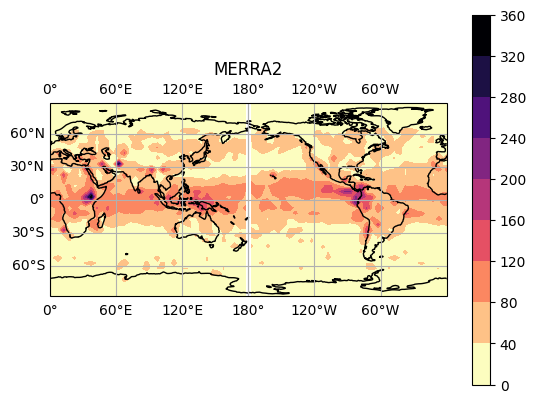

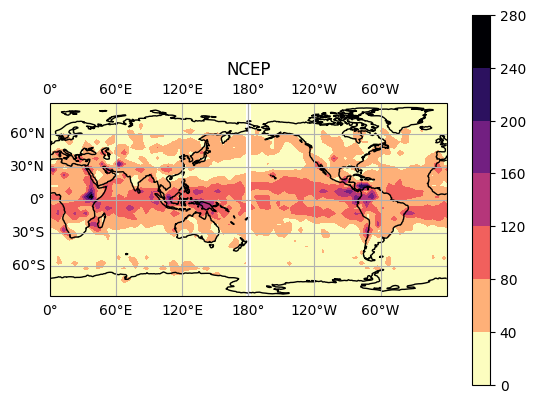

In [15]:
# Check geographical distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 100000)
    sample_pts = data[s].sel(record = sample)
    sample_pts.hrcn.plot_density()
    plt.title(s)

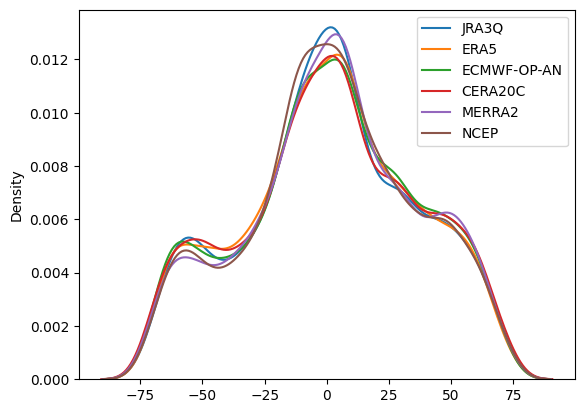

In [16]:
# Check latitude distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 10000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(sample_pts.lat, label = s)
plt.legend()

/tmp/ipykernel_7035/2907107950.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


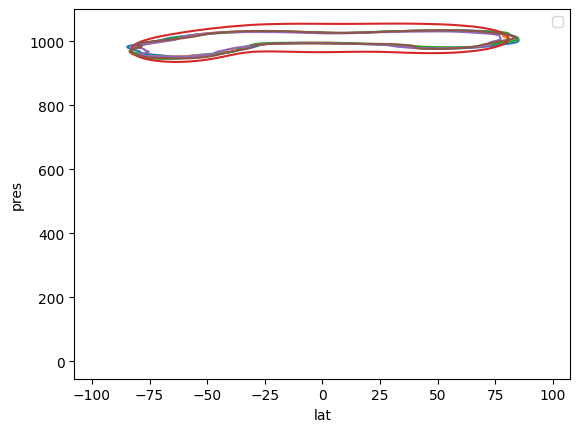

In [17]:
# Check psl values
for s in sources:
    sample = np.random.choice(len(data[s].record), 1000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(x=sample_pts.lat, y=sample_pts.pres, levels = 2, label = s)
plt.legend()

/tmp/ipykernel_7035/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7035/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7035/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7035/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_7035/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists w

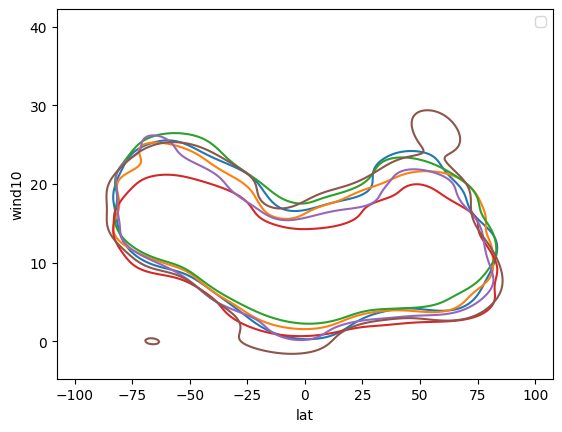

In [18]:
# Check wind values
for s in sources:
    sample = np.random.choice(len(data[s].record), 1000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(x=sample_pts.lat, y=sample_pts.wind10.where(sample_pts.wind10 <1e10), levels = 2,)
    plt.legend()

In [19]:
for s in tqdm(sources):
    huracanpy.save(data[s], "TRACK/TRACK-"+s+".csv")

100%|██████████| 6/6 [11:13<00:00, 112.29s/it]


## Tracks with CPS

In [15]:
flist = glob("TRACK_netcdf/*/*TRACK_tcident_nolat_CPS.nc") 
flist

['TRACK_netcdf/JRA3Q/JRA3Q_TRACK_tcident_nolat_CPS.nc',
 'TRACK_netcdf/ERA5/ERA5_TRACK_tcident_nolat_CPS.nc']

In [16]:
# List of available datasets
sources = [f.split('/')[1] for f in flist]
sources

['JRA3Q', 'ERA5']

In [17]:
# Path dict
filepaths = {sources[i]:flist[i] for i in range(len(flist))}

In [18]:
# Data dict
data = {}
for s in tqdm(sources):
    data[s] = xr.open_dataset(filepaths[s]).rename({"psl":"pres"})

100%|██████████| 2/2 [00:05<00:00,  2.55s/it]


In [19]:
# Check trackids
for s in sources:
    sample = np.random.choice(len(data[s].record), 3)
    sample_pts = data[s].sel(record = sample)
    print(s, sample_pts.track_id.values)

JRA3Q ['SH-1989-16213' 'NH-1994-21590' 'SH-1993-20730']
ERA5 ['NH-1954-3381' 'NH-2009-12942' 'SH-2021-7305']


(0.0, 994.65)

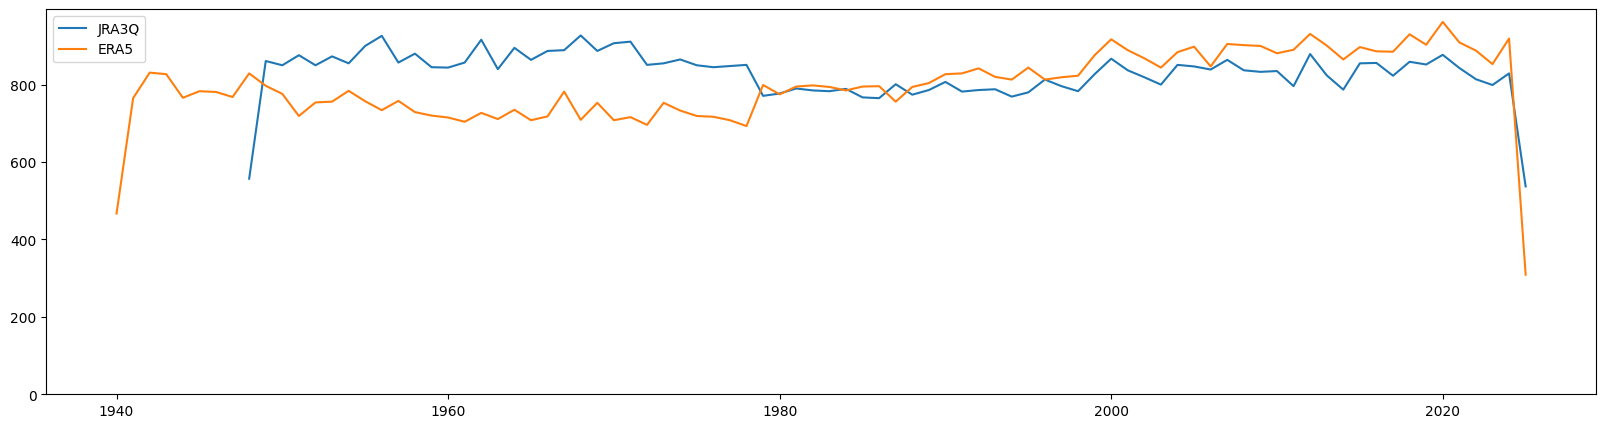

In [20]:
# Check Number of tracks per year
fig, axs = plt.subplots(figsize = (20,5))
for s in sources:
    Y = np.arange(1850, 2030)
    H, _ = np.histogram(data[s].hrcn.get_gen_vals().time.dt.year, bins = np.arange(1849.5, 2030))
    axs.plot(Y[H>0], H[H>0],label = s)
plt.legend()
plt.ylim(0)

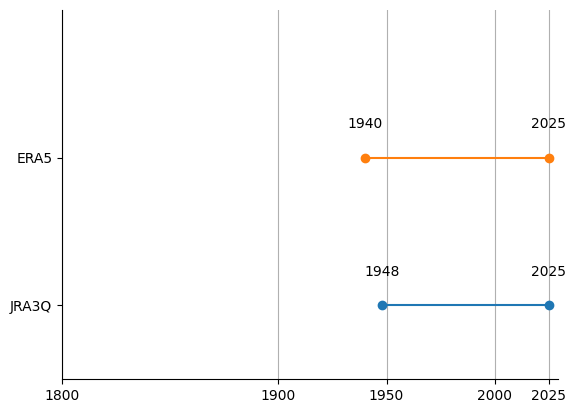

In [21]:
# Check durations
for i, s in enumerate(sources):
    Ymin, Ymax = data[s].time.dt.year.min().values, data[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(sources)), sources)
plt.xticks([1800, 1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(sources))
sns.despine()
plt.grid(axis = 'x')

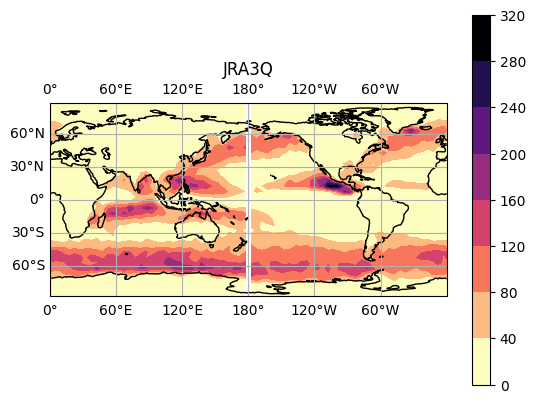

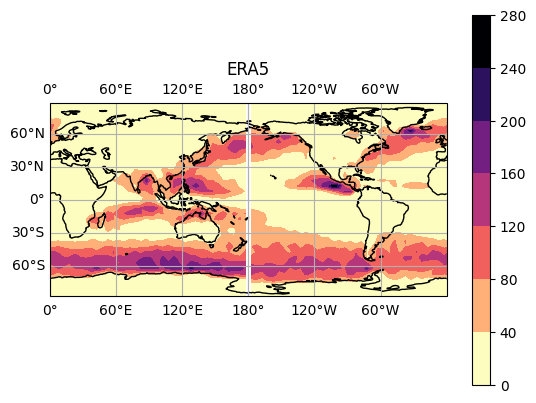

In [22]:
# Check geographical distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 100000)
    sample_pts = data[s].sel(record = sample)
    sample_pts.hrcn.plot_density()
    plt.title(s)

In [23]:
for s in sources:
    huracanpy.save(data[s], "TRACK_CPS/TRACK_CPS-"+s+".csv")